In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read the dataset
df = pd.read_csv("Instagram.csv", encoding='latin1')

# Downscale 
print(df.shape)

(10000, 3)


In [3]:
df.head()

,reviewId,content,score
0,4065aac6-a7b5-41dd-90ed-d2f864fa91e2,Music option not working ð,1
1,9130aa7d-d368-498f-a21b-05253a65d9e5,Love this App,5
2,ec8ff3a5-7a8e-4e9f-b4a3-6eb4b9e31692,"Triphal re I'ma g hi nopzA,",4
3,127c8258-966c-46ea-9ae6-78e6eca1da33,Instagram ka dp ka bhi system thik nahi he or ...,5
4,02a9e2f9-ffee-49bf-837d-935473883ce0,awsome,5


In [4]:
example = df['content']
print(example)

0                           Music option not working ð
1                                           Love this App
2                             Triphal re I'ma g hi nopzA,
3       Instagram ka dp ka bhi system thik nahi he or ...
4                                                  awsome
                              ...                        
9995                         Great so far awesome and fun
9996                                                 Awww
9997                                    Excellentðð¯
9998                                         This aap osm
9999                             ð¤ð»ð¤ð»ð¤ð»
Name: content, Length: 10000, dtype: object


# Introduction


In [5]:
import nltk
import numpy as np
import matplotlib as mp
import pandas as pd

In [6]:
example = df['content'][71]

In [7]:
import nltk
from nltk.text import Text

# Sample text
text = example

# Tokenize the text
tokens = nltk.word_tokenize(text)

# Create an NLTK Text object
text_obj = Text(tokens)

# Use the concordance method
text_obj.concordance("good")

Displaying 1 of 1 matches:
r ðð « because this app is very good âºï¸


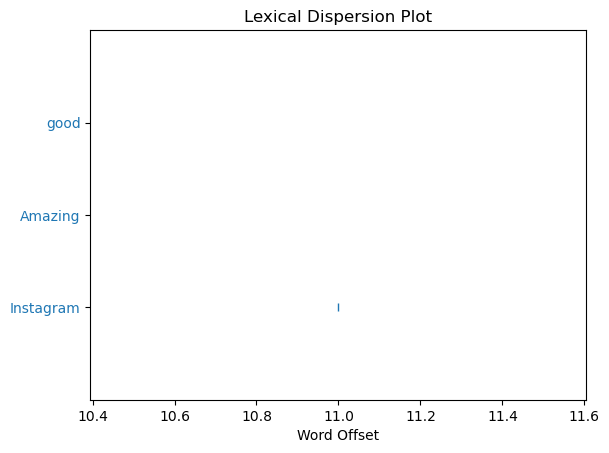

In [8]:
text_obj.dispersion_plot(["Instagram", "Amazing","good"])

In [9]:
text_obj.similar("awsome")

No matches


In [10]:
len(example)

62

In [11]:
set(example)

{' ',
 'I',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'o',
 'p',
 'r',
 's',
 't',
 'u',
 'v',
 'y',
 '\x8c',
 '\x8f',
 '\x92',
 '\x98',
 '\x9f',
 '«',
 '¸',
 'º',
 'â',
 'ï',
 'ð'}

In [12]:
sorted(set(example))

[' ',
 'I',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'o',
 'p',
 'r',
 's',
 't',
 'u',
 'v',
 'y',
 '\x8c',
 '\x8f',
 '\x92',
 '\x98',
 '\x9f',
 '«',
 '¸',
 'º',
 'â',
 'ï',
 'ð']

In [13]:
len(set(example)) / len(example) 

0.4838709677419355

In [14]:
# word tokenization
print(example.split())

['I', 'give', 'five', 'star', 'ð\x9f\x8c\x9fð\x9f\x92«', 'because', 'this', 'app', 'is', 'very', 'good', 'â\x98ºï¸\x8f']


In [15]:
# sentence tokenizer
example.split('.')

['I give five star ð\x9f\x8c\x9fð\x9f\x92« because this app is very good â\x98ºï¸\x8f']

In [16]:
from nltk.tokenize import word_tokenize
print(word_tokenize(example))

['I', 'give', 'five', 'star', 'ð\x9f\x8c\x9fð\x9f\x92', '«', 'because', 'this', 'app', 'is', 'very', 'good', 'â\x98ºï¸\x8f']


In [17]:
from nltk.tokenize import WhitespaceTokenizer
list(WhitespaceTokenizer().span_tokenize(example))

[(0, 1),
 (2, 6),
 (7, 11),
 (12, 16),
 (17, 25),
 (26, 33),
 (34, 38),
 (39, 42),
 (43, 45),
 (46, 50),
 (51, 55),
 (56, 62)]

# Filtering Stop Words

In [18]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
stop_words = set(stopwords.words('english'))    #List of Stop Words
 
word_tokens = word_tokenize(example)       # Tokens (ALL)
print(word_tokens)
# converts the words in word_tokens to lower case and then checks whether 
#they are present in stop_words or not
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]  
print(filtered_sentence)
#[This, sample, sentence, showing, stop, words, filteration]
# all words in word_tokens if its lower case is not in stop_words--> filtered_sentence
#with no lower case conversion
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words: #Not taking case into consideration
        filtered_sentence.append(w)
print(filtered_sentence)

['I', 'give', 'five', 'star', 'ð\x9f\x8c\x9fð\x9f\x92', '«', 'because', 'this', 'app', 'is', 'very', 'good', 'â\x98ºï¸\x8f']
['give', 'five', 'star', 'ð\x9f\x8c\x9fð\x9f\x92', '«', 'app', 'good', 'â\x98ºï¸\x8f']
['I', 'give', 'five', 'star', 'ð\x9f\x8c\x9fð\x9f\x92', '«', 'app', 'good', 'â\x98ºï¸\x8f']


# POS Tagging

In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))

# sent_tokenize is one of instances of 
# PunktSentenceTokenizer from the nltk.tokenize.punkt module
 
tokenized = sent_tokenize(example)
for i in tokenized:
     
    # Word tokenizers is used to find the words 
    # and punctuation in a string        Sukanya, Rajib and Naba are my good friends.
    wordsList = nltk.word_tokenize(i)
 
    # removing stop words from wordList
    wordsList = [w for w in wordsList if not w in stop_words] 
 
    #  Using a Tagger. Which is part-of-speech 
    # tagger or POS-tagger. 
    tagged = nltk.pos_tag(wordsList)
    print(example)
    print(tagged)

I give five star ðð« because this app is very good âºï¸
[('I', 'PRP'), ('give', 'VBP'), ('five', 'CD'), ('star', 'NN'), ('ð\x9f\x8c\x9fð\x9f\x92', 'NN'), ('«', 'NNP'), ('app', 'RB'), ('good', 'JJ'), ('â\x98ºï¸\x8f', 'NN')]


In [20]:
from nltk import pos_tag
from nltk import word_tokenize
 
tokenized_text = word_tokenize(example)
tags = tokens_tag = pos_tag(tokenized_text)
tags

[('I', 'PRP'),
 ('give', 'VBP'),
 ('five', 'CD'),
 ('star', 'NN'),
 ('ð\x9f\x8c\x9fð\x9f\x92', 'NN'),
 ('«', 'NN'),
 ('because', 'IN'),
 ('this', 'DT'),
 ('app', 'NN'),
 ('is', 'VBZ'),
 ('very', 'RB'),
 ('good', 'JJ'),
 ('â\x98ºï¸\x8f', 'NN')]

In [21]:
(example.count("a")/len(example))*100 # TERM FREQUENCY TF_IDF

4.838709677419355

In [22]:
import re                                #Regular Expression
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Convert text to lowercase
text = example
print(text)
text = text.lower()
print(text)


# Remove special characters, punctuation, and numbers
text = re.sub(r'[^a-zA-Z\s]', '', text)
print(text)

I give five star ðð« because this app is very good âºï¸
i give five star ðð« because this app is very good âºï¸
i give five star  because this app is very good 


# Stop Words and POS Tagging

In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))
 
# Dummy text
txt = example
# sent_tokenize is one of instances of 
# PunktSentenceTokenizer from the nltk.tokenize.punkt module
 
tokenized = sent_tokenize(txt) #Tokenize the whole text in sentences.
print(tokenized)
#print(txt)
for i in tokenized:
    # Word tokenizers is used to find the words 
    # and punctuation in a string  Once upon a time, There was a thirsty crow who was thirsty and searching for water.
    wordsList = nltk.word_tokenize(i)
    #print(wordsList)
    # removing stop words from wordList
    wordsList = [w for w in wordsList if not w.lower() in stop_words] 
    print(wordsList)    # ['Once', 'upon', 'time', ',', 'There', 'thirsty', 'crow', 'thirsty', 'searching', 'water', '.']
    #  Using a Tagger. Which is part-of-speech 
    # tagger or POS-tagger. 
    tagged = nltk.pos_tag(wordsList)
    print(tagged)    
    print('_______________________________________________________________________')

['I give five star ð\x9f\x8c\x9fð\x9f\x92« because this app is very good â\x98ºï¸\x8f']
['give', 'five', 'star', 'ð\x9f\x8c\x9fð\x9f\x92', '«', 'app', 'good', 'â\x98ºï¸\x8f']
[('give', 'VB'), ('five', 'CD'), ('star', 'NN'), ('ð\x9f\x8c\x9fð\x9f\x92', 'NN'), ('«', 'NNP'), ('app', 'RB'), ('good', 'JJ'), ('â\x98ºï¸\x8f', 'NN')]
_______________________________________________________________________


# Entities

In [24]:
import nltk

# Download necessary NLTK data packages
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sumithbhargav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sumithbhargav/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/sumithbhargav/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/sumithbhargav/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))
 
# Dummy text
txt = example
# sent_tokenize is one of instances of 
# PunktSentenceTokenizer from the nltk.tokenize.punkt module

#txt = txt.lower()
#print(txt)

tokenized = sent_tokenize(txt) #Tokenize the whole text in sentences.
#print(tokenized)

for i in tokenized:
    # Word tokenizers is used to find the words 
    # and punctuation in a string  Once upon a time, There was a thirsty crow who was thirsty and searching for water.
    wordsList = nltk.word_tokenize(i)
    #print(wordsList)
    # removing stop words from wordList
    wordsList = [w for w in wordsList if not w.lower() in stop_words] 
    #print(wordsList)    # ['Once', 'upon', 'time', ',', 'There', 'thirsty', 'crow', 'thirsty', 'searching', 'water', '.']
    #  Using a Tagger. Which is part-of-speech 
    # tagger or POS-tagger. 
    tagged = nltk.pos_tag(wordsList)
    #print(tagged)        
    entities = nltk.ne_chunk(tagged)
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    print(entities)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
(S give/VB five/CD star/NN ðð/NN «/NNP app/RB good/JJ âºï¸/NN)


# Preprocessing

In [26]:
import re
import nltk  # Import nltk library
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    print(text)
    print("__________________________________________________________________")
    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    print(text)
    print("__________________________________________________________________")
    # Tokenize text
    tokens = word_tokenize(text)
    print(tokens)
    print("__________________________________________________________________")
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    print(tokens)
    print("__________________________________________________________________")
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    print(tokens)
    print("__________________________________________________________________")
    # POS tagging
    tags = pos_tag(tokens)
    print(tags)
    print("__________________________________________________________________")
    # Named Entity Recognition
    entities = nltk.ne_chunk(tags)  # Apply named entity recognition
    print(entities)
    print("__________________________________________________________________")
    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Example usage
example = df['content'][0]  # Get the text from the first row of the 'Text' column
print(example)  # Printing the example text
print("__________________________________________________________________")
clean_text = preprocess_text(example)
print(clean_text)

Music option not working ð
__________________________________________________________________
music option not working ð
__________________________________________________________________
music option not working 
__________________________________________________________________
['music', 'option', 'not', 'working']
__________________________________________________________________
['music', 'option', 'working']
__________________________________________________________________
['music', 'option', 'working']
__________________________________________________________________
[('music', 'NN'), ('option', 'NN'), ('working', 'VBG')]
__________________________________________________________________
(S music/NN option/NN working/VBG)
__________________________________________________________________
music option working


# SPACY

In [27]:
example = df['content'][60]
print(example)

What's Wrong ??? I installed the app many times and updated .. but it's not working.. why I can't log in..


In [28]:
import spacy 
obj = spacy.load("en_core_web_sm") #object of class   #(sm is source model, lm is language model)

doc = obj(example)
print("_________________________________________________________________________________")
for token in doc : 
    print(token.text, token.pos_, token.dep_) #depth is discription of pos tag. 

_________________________________________________________________________________
What PRON nsubj
's AUX ROOT
Wrong ADJ acomp
? PUNCT punct
? PUNCT punct
? PUNCT punct
I PRON nsubj
installed VERB ROOT
the DET det
app NOUN dobj
many ADJ amod
times NOUN npadvmod
and CCONJ cc
updated VERB conj
.. PUNCT punct
but CCONJ cc
it PRON nsubj
's AUX aux
not PART neg
working VERB ROOT
.. PUNCT punct
why SCONJ advmod
I PRON nsubj
ca AUX aux
n't PART neg
log VERB ccomp
in ADP prt
.. PUNCT punct


In [29]:
import spacy 
obj = spacy.load("en_core_web_sm") 

#Create an nlp Object
rel = obj(example)

# Iterate over the tokens
for token in rel : 
    # Print tokens and their part-of-speech tag
    print(token, "-->", token.tag_, "-->", token.pos_, "-->")

What --> WP --> PRON -->
's --> VBZ --> AUX -->
Wrong --> JJ --> ADJ -->
? --> . --> PUNCT -->
? --> . --> PUNCT -->
? --> . --> PUNCT -->
I --> PRP --> PRON -->
installed --> VBD --> VERB -->
the --> DT --> DET -->
app --> NN --> NOUN -->
many --> JJ --> ADJ -->
times --> NNS --> NOUN -->
and --> CC --> CCONJ -->
updated --> VBN --> VERB -->
.. --> . --> PUNCT -->
but --> CC --> CCONJ -->
it --> PRP --> PRON -->
's --> VBZ --> AUX -->
not --> RB --> PART -->
working --> VBG --> VERB -->
.. --> NFP --> PUNCT -->
why --> WRB --> SCONJ -->
I --> PRP --> PRON -->
ca --> MD --> AUX -->
n't --> RB --> PART -->
log --> VB --> VERB -->
in --> RP --> ADP -->
.. --> . --> PUNCT -->


In [30]:
import spacy 
from spacy import displacy 
nlp = spacy.load("en_core_web_sm") 

doc = nlp(example)
displacy.render(doc, style = "dep", jupyter = True)

In [31]:
import spacy
obj = spacy.load("en_core_web_sm") # Object of class Spacy 

# Create an obj object 
rel = obj(example)

# Iterate over the tokens 
for token in rel:
    # Print the token and its parts-of-speech tag 
    print(token, "---->", token.tag_, "---->", token.pos_,"---->", spacy.explain(token.tag_))

What ----> WP ----> PRON ----> wh-pronoun, personal
's ----> VBZ ----> AUX ----> verb, 3rd person singular present
Wrong ----> JJ ----> ADJ ----> adjective (English), other noun-modifier (Chinese)
? ----> . ----> PUNCT ----> punctuation mark, sentence closer
? ----> . ----> PUNCT ----> punctuation mark, sentence closer
? ----> . ----> PUNCT ----> punctuation mark, sentence closer
I ----> PRP ----> PRON ----> pronoun, personal
installed ----> VBD ----> VERB ----> verb, past tense
the ----> DT ----> DET ----> determiner
app ----> NN ----> NOUN ----> noun, singular or mass
many ----> JJ ----> ADJ ----> adjective (English), other noun-modifier (Chinese)
times ----> NNS ----> NOUN ----> noun, plural
and ----> CC ----> CCONJ ----> conjunction, coordinating
updated ----> VBN ----> VERB ----> verb, past participle
.. ----> . ----> PUNCT ----> punctuation mark, sentence closer
but ----> CC ----> CCONJ ----> conjunction, coordinating
it ----> PRP ----> PRON ----> pronoun, personal
's ----> VBZ -

In [32]:
for word in rel.ents:
    print(word.text, word.label_)

In [33]:
for ent in rel.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

In [34]:
spacy.explain("AUX")

'auxiliary'

In [35]:
displacy.render(rel, style = "ent", jupyter = True)

/Applications/anaconda3/lib/python3.11/site-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


# Sentiment Analysis 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [37]:
df = pd.read_csv('Instagram.csv')
print(df.shape)

(10000, 3)


In [38]:
df.head()

,reviewId,content,score
0,4065aac6-a7b5-41dd-90ed-d2f864fa91e2,Music option not working 😔,1
1,9130aa7d-d368-498f-a21b-05253a65d9e5,Love this App,5
2,ec8ff3a5-7a8e-4e9f-b4a3-6eb4b9e31692,"Triphal re I'ma g hi nopzA,",4
3,127c8258-966c-46ea-9ae6-78e6eca1da33,Instagram ka dp ka bhi system thik nahi he or ...,5
4,02a9e2f9-ffee-49bf-837d-935473883ce0,awsome,5


# Quick EDA

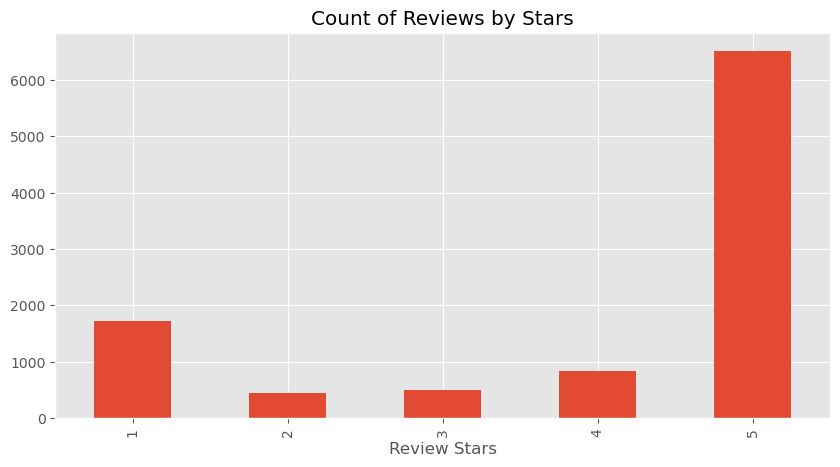

In [39]:
ax = df['score'].value_counts().sort_index() \
          .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

# Basic NLTK

In [40]:
#Downscale
df = df.head(100)
print(df.shape)

(100, 3)


In [41]:
example = df['content'][31]
print(example)

It disables so many of my accounts in which i dont like


In [42]:
tokens = nltk.word_tokenize(example)
tokens[:12]

['It',
 'disables',
 'so',
 'many',
 'of',
 'my',
 'accounts',
 'in',
 'which',
 'i',
 'dont',
 'like']

In [43]:
tagged = nltk.pos_tag(tokens)
tagged[-5:]

[('in', 'IN'), ('which', 'WDT'), ('i', 'VBP'), ('dont', 'VBP'), ('like', 'IN')]

In [44]:
entities = nltk.chunk.ne_chunk(tagged)
print(entities)
#entities.pprint()

(S
  It/PRP
  disables/VBZ
  so/RB
  many/JJ
  of/IN
  my/PRP$
  accounts/NNS
  in/IN
  which/WDT
  i/VBP
  dont/VBP
  like/IN)


# Step 1. VADER Sentiment Scoring

In [45]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sumithbhargav/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [46]:
pip install --upgrade tqdm

Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install --upgrade nltk


Note: you may need to restart the kernel to use updated packages.


In [48]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [49]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [50]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm

# Download NLTK data
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Example usage of tqdm
for i in tqdm(range(10)):
    # Your code here
    pass

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sumithbhargav/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
100%|████████████████████████████████████████| 10/10 [00:00<00:00, 83220.32it/s]


In [51]:
sia.polarity_scores(example)

{'neg': 0.174, 'neu': 0.826, 'pos': 0.0, 'compound': -0.2755}

In [54]:
# Run the polarity score on the entire dataset
extdata = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['content']
    myid = row['reviewId']
    extdata[myid] = sia.polarity_scores(text)

100%|███████████████████████████████████████| 100/100 [00:00<00:00, 4396.36it/s]


In [55]:
vaders = pd.DataFrame(extdata).T
vaders = vaders.reset_index().rename(columns={'index': 'reviewId'})
vaders = vaders.merge(df, how='left')

In [56]:
vaders.head()

,reviewId,neg,neu,pos,compound,content,score
0,4065aac6-a7b5-41dd-90ed-d2f864fa91e2,0.0,1.000,0.000,0.0000,Music option not working 😔,1
1,9130aa7d-d368-498f-a21b-05253a65d9e5,0.0,0.323,0.677,0.6369,Love this App,5
2,ec8ff3a5-7a8e-4e9f-b4a3-6eb4b9e31692,0.0,1.000,0.000,0.0000,"Triphal re I'ma g hi nopzA,",4
3,127c8258-966c-46ea-9ae6-78e6eca1da33,0.0,1.000,0.000,0.0000,Instagram ka dp ka bhi system thik nahi he or ...,5
4,02a9e2f9-ffee-49bf-837d-935473883ce0,0.0,1.000,0.000,0.0000,awsome,5


# Plot VADER results

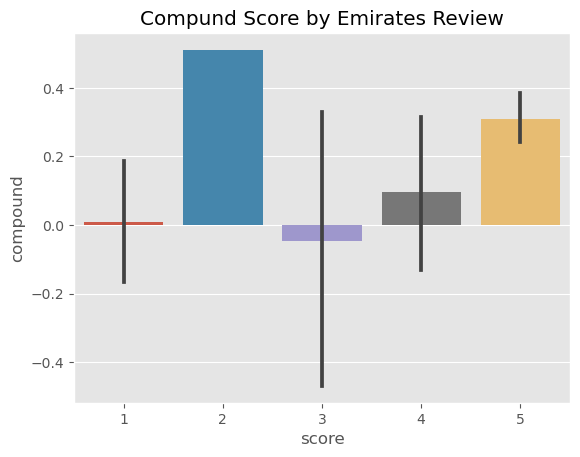

In [59]:
ax = sns.barplot(data=vaders, x='score', y='compound')
ax.set_title('Compund Score by Emirates Review')
plt.show()

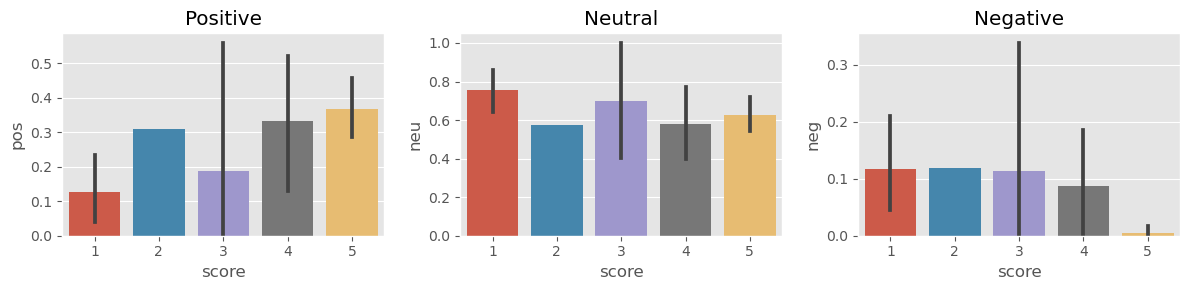

In [61]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()